In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline


Importing Dataset


In [6]:
titanic = sns.load_dataset('titanic')

In [7]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


setting up figure sizes

In [5]:
plt.rcParams['figure.figsize'] = [6,3]
plt.rcParams['figure.dpi'] = 80

In [8]:
cols = titanic.columns

In [9]:
print(cols)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [10]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
titanic.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 313.7 KB


Heatmap

In [12]:
plt.style.use('ggplot')

Finding out null values present in the dataset


In [15]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

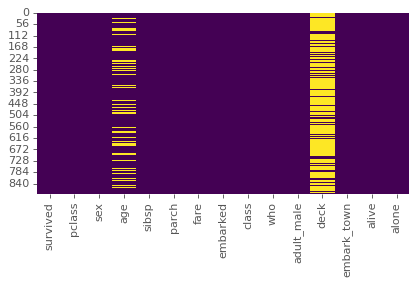

In [21]:
sns.heatmap(titanic.isna(), cmap = 'viridis', cbar=False)

correlated dataset plotting

In [23]:
correlation = titanic.corr()

In [24]:
correlation

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

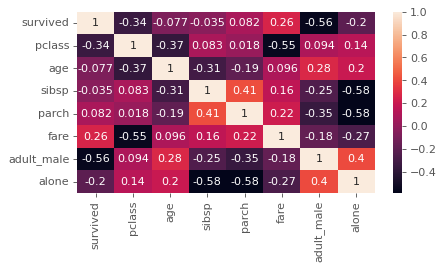

In [25]:
sns.heatmap(correlation, annot=True)

Univariate analysis

In [26]:
list(cols)

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

C:\Users\97798\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\97798\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


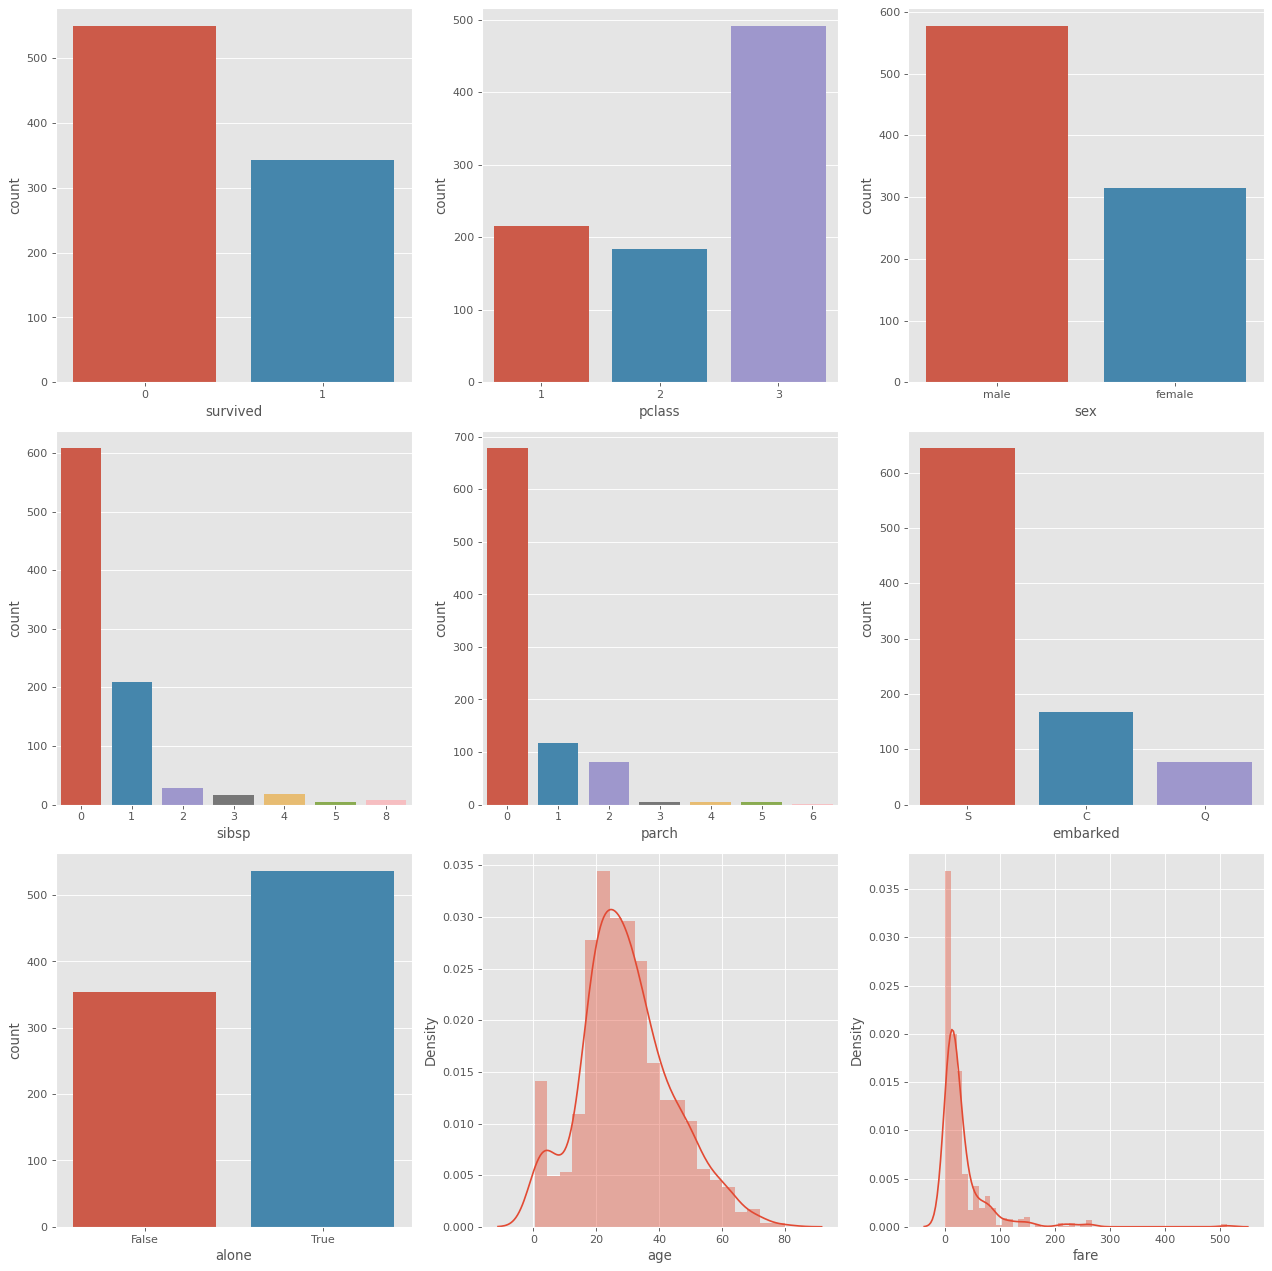

In [39]:
fig, ax = plt.subplots(3,3, figsize = (16,16))

sns.countplot(x='survived', data = titanic, ax = ax[0][0])
sns.countplot(x='pclass', data = titanic, ax = ax[0][1])
sns.countplot(x='sex', data = titanic, ax = ax[0][2])
sns.countplot(x='sibsp', data = titanic, ax = ax[1][0])
sns.countplot(x='parch', data = titanic, ax = ax[1][1])
sns.countplot(x='embarked', data = titanic, ax = ax[1][2])
sns.countplot(x='alone', data = titanic, ax = ax[2][0])
sns.distplot(titanic['age'], kde=True, ax = ax[2][1])
sns.distplot(titanic['fare'], kde=True, ax = ax[2][2])


plt.tight_layout()

Survived Class

In [41]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

([<matplotlib.axis.XTick at 0x1df67e8bca0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

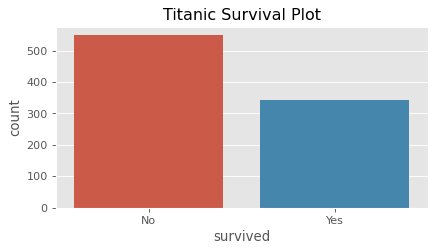

In [52]:
sns.countplot(
    x= 'survived',
    data = titanic
)

plt.title('Titanic Survival Plot')
plt.xticks([0, 1], ['No', 'Yes'])  # Specify the x-labels



([<matplotlib.axis.XTick at 0x1df67ee1460>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

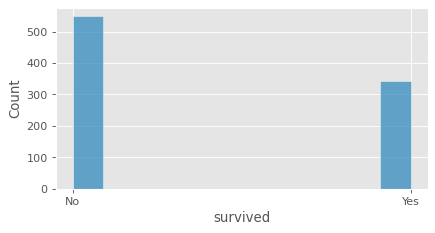

In [53]:
sns.histplot(
   x= 'survived',
    data = titanic

)

plt.xticks([0, 1], ['No', 'Yes'])  # Specify the x-labels


<AxesSubplot:ylabel='survived'>

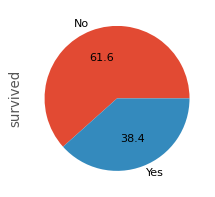

In [56]:
titanic.survived.value_counts().plot(kind = 'pie', 
                                     autopct = '%1.1f',
                                     labels = ['No','Yes']
        
                                 )



<AxesSubplot:ylabel='survived'>

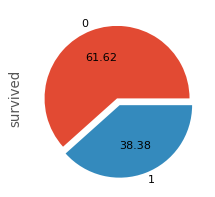

In [62]:
explode  = [0,0.1]

titanic.survived.value_counts().plot.pie(explode = explode,autopct = '%1.2f')

Pclass

In [65]:
titanic.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [75]:
titanic.groupby(['pclass','survived']).survived.agg('count')

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

Text(0.5, 1.0, 'Distribution of passengers along the class')

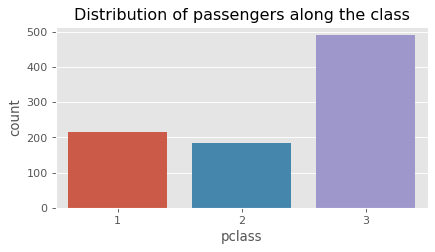

In [78]:
sns.countplot(
    x= 'pclass',
    data = titanic
)

plt.title('Distribution of passengers along the class')

<AxesSubplot:xlabel='pclass', ylabel='count'>

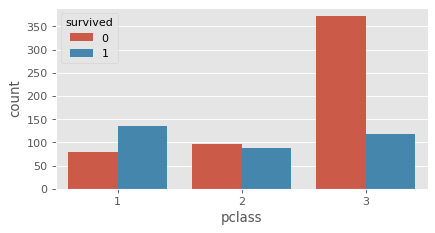

In [79]:
sns.countplot(
    x='pclass',
    data = titanic,
    hue='survived'
)

<AxesSubplot:ylabel='pclass'>

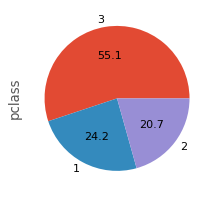

In [87]:
titanic['pclass'].value_counts().plot.pie(autopct = '%1.1f')

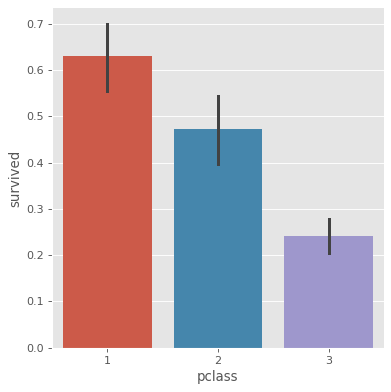

In [89]:
sns.catplot(
    x= 'pclass',
    y = 'survived',
    data = titanic,
    kind='bar'
)

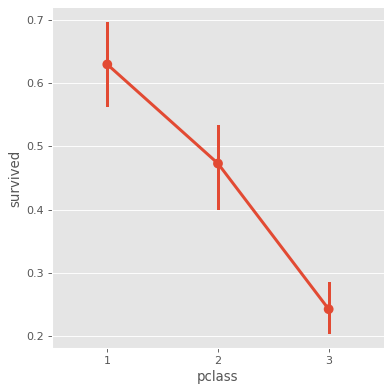

In [90]:
sns.catplot(
    x= 'pclass',
    y = 'survived',
    data = titanic,
    kind='point'
)

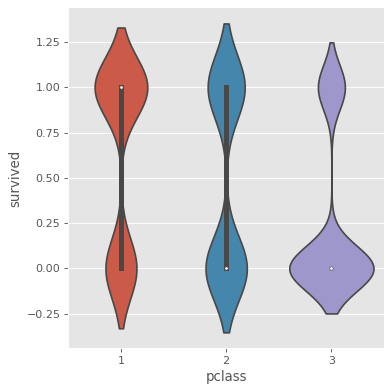

In [93]:
sns.catplot(
    x= 'pclass',
    y = 'survived',
    data = titanic,
    kind='violin'
)

Sex

In [96]:
titanic.sex.value_counts()


male      577
female    314
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

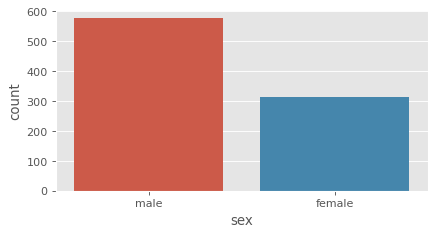

In [97]:
sns.countplot(
    x='sex',
    data = titanic
)

In [99]:
titanic.groupby(['sex', 'survived']).survived.agg('count')

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

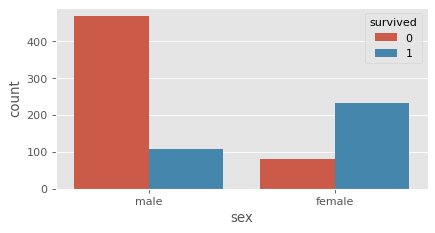

In [100]:
sns.countplot(
    x='sex',
    data = titanic, 
    hue = 'survived'
)

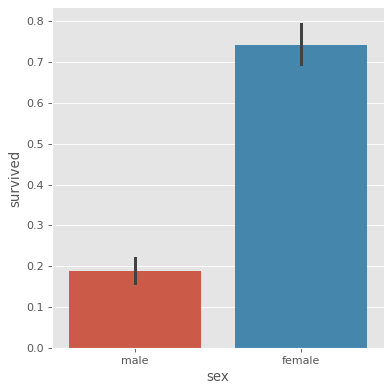

In [102]:
sns.catplot(
    x='sex',
    y= 'survived',
    data = titanic,
    kind = 'bar'
)

<AxesSubplot:ylabel='sex'>

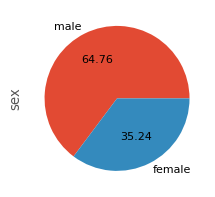

In [105]:
titanic.sex.value_counts().plot.pie(autopct = '%1.2f')

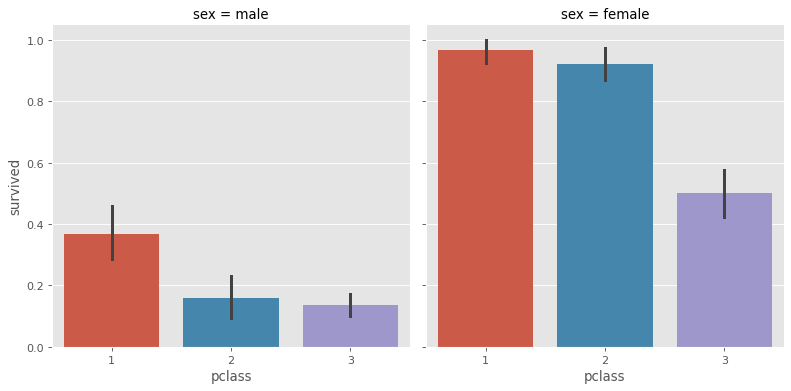

In [108]:
sns.catplot(
    x='pclass',
    y= 'survived',
    data = titanic,
    kind = 'bar',
    col = 'sex'
)

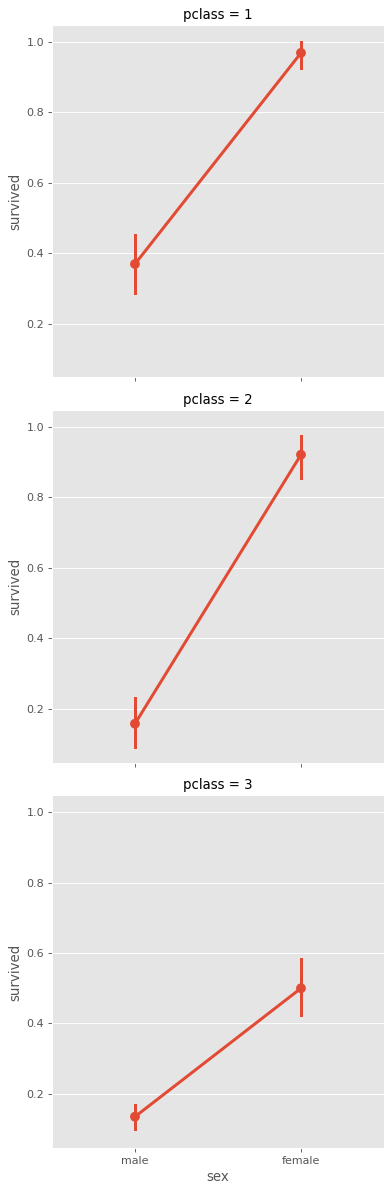

In [118]:
sns.catplot(
     x='sex',
    y= 'survived',
    data = titanic,
    kind = 'point', 
    row='pclass'
    
)

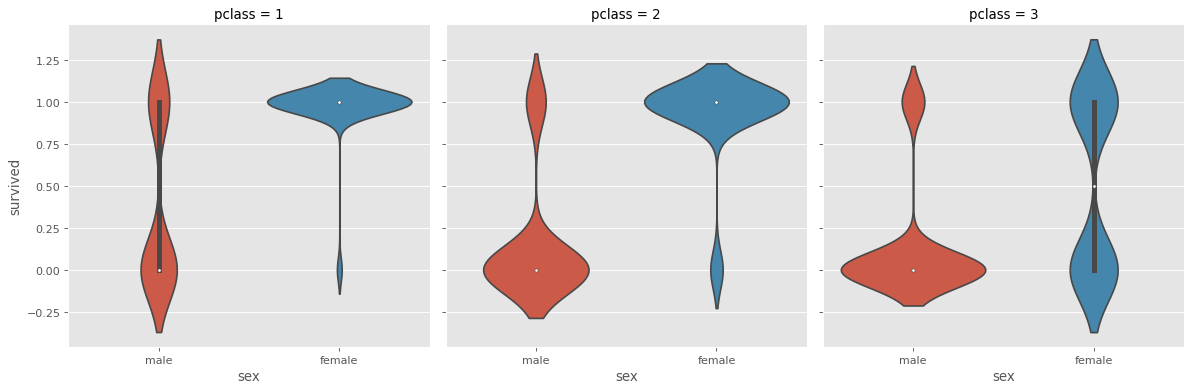

In [127]:
sns.catplot(
    x='sex',
    y= 'survived',
    data = titanic,
    kind = 'violin',
    col = 'pclass'
    
)

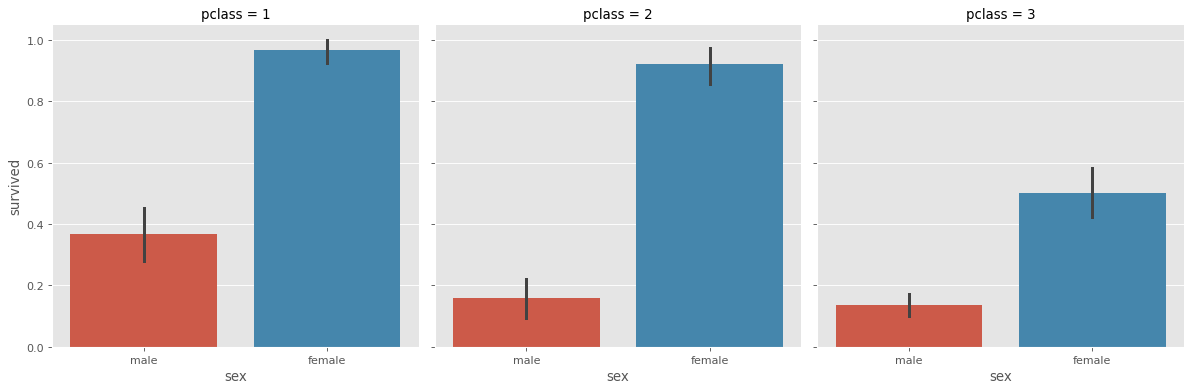

In [135]:
sns.catplot(
    x= 'sex',
    y='survived',
    data = titanic,
    col = 'pclass',
    kind = 'bar'
)

Age

In [137]:
titanic.age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

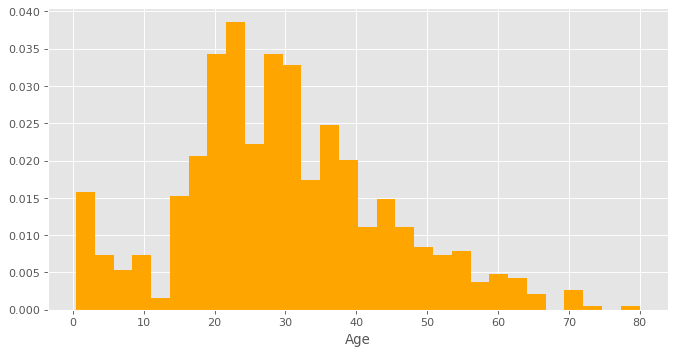

In [143]:
titanic.age.hist(
    bins = 30,
    density = True,
    color = 'orange',
    figsize = (10,5)
)

plt.xlabel('Age')
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

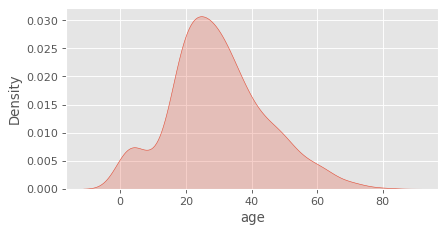

In [148]:
sns.kdeplot(titanic.age, shade = True)

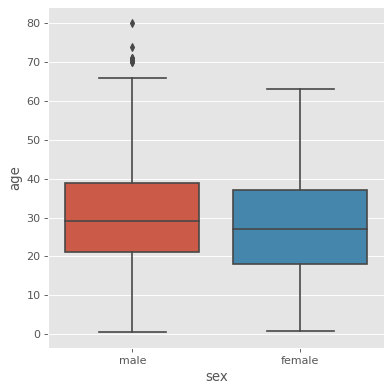

In [152]:
sns.catplot(
    x='sex',
    y= 'age',
    data = titanic,
    kind = 'box'
)

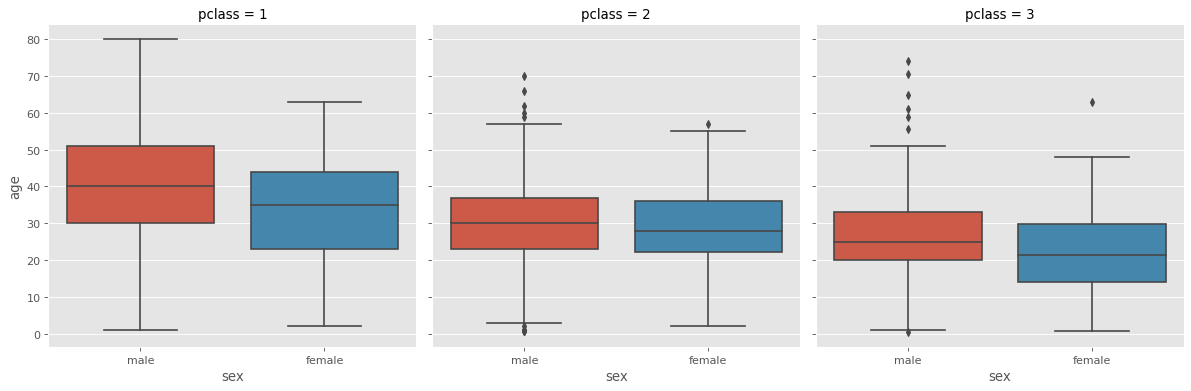

In [155]:
sns.catplot(
    x='sex',
    y= 'age',
    data = titanic,
    kind = 'box',
    col = 'pclass'
)

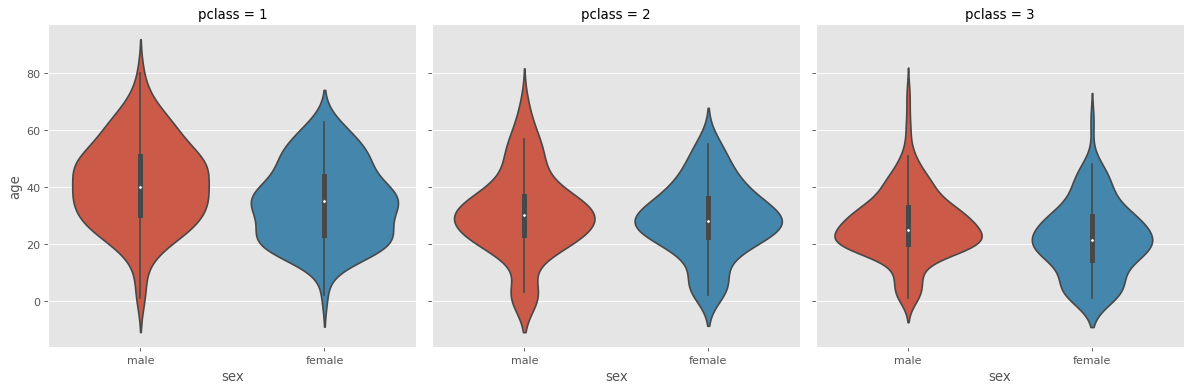

In [156]:
sns.catplot(
    x='sex',
    y= 'age',
    data = titanic,
    kind = 'violin',
    col = 'pclass'
)

C:\Users\97798\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


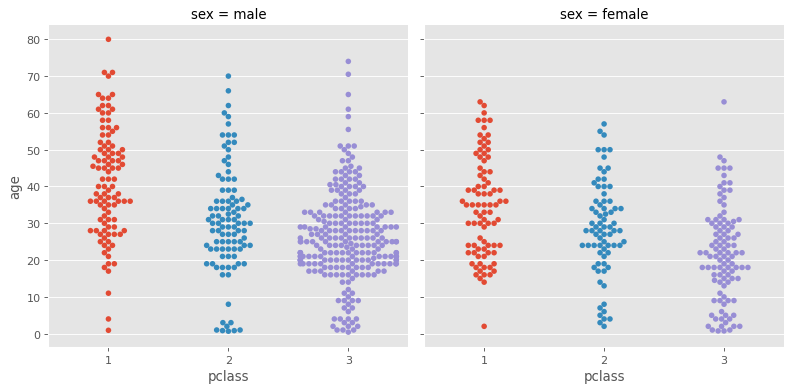

In [166]:
sns.catplot(
    x='pclass',
    y= 'age',
    data = titanic,
    kind = 'swarm',
    col = 'sex'
    
)

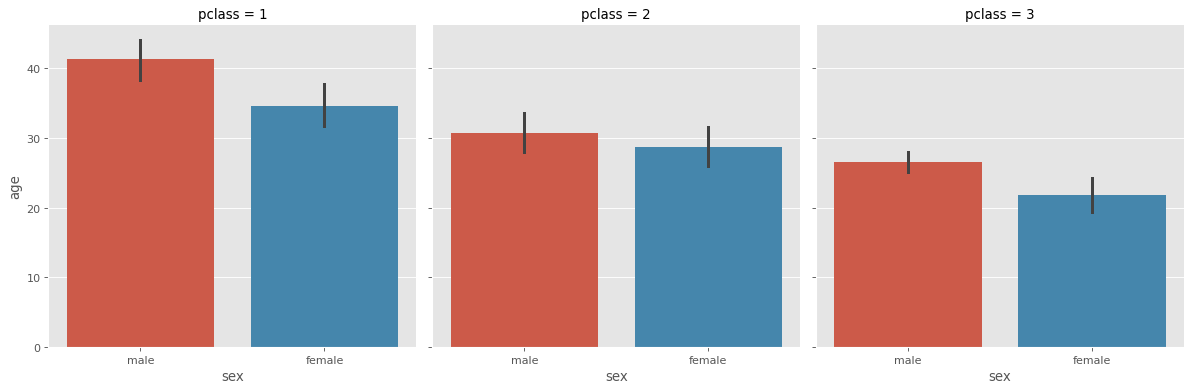

In [168]:
sns.catplot(
    x='sex',
    y='age',
    kind = 'bar',
    data = titanic,
    col = 'pclass'
)

In [169]:
# age and sex

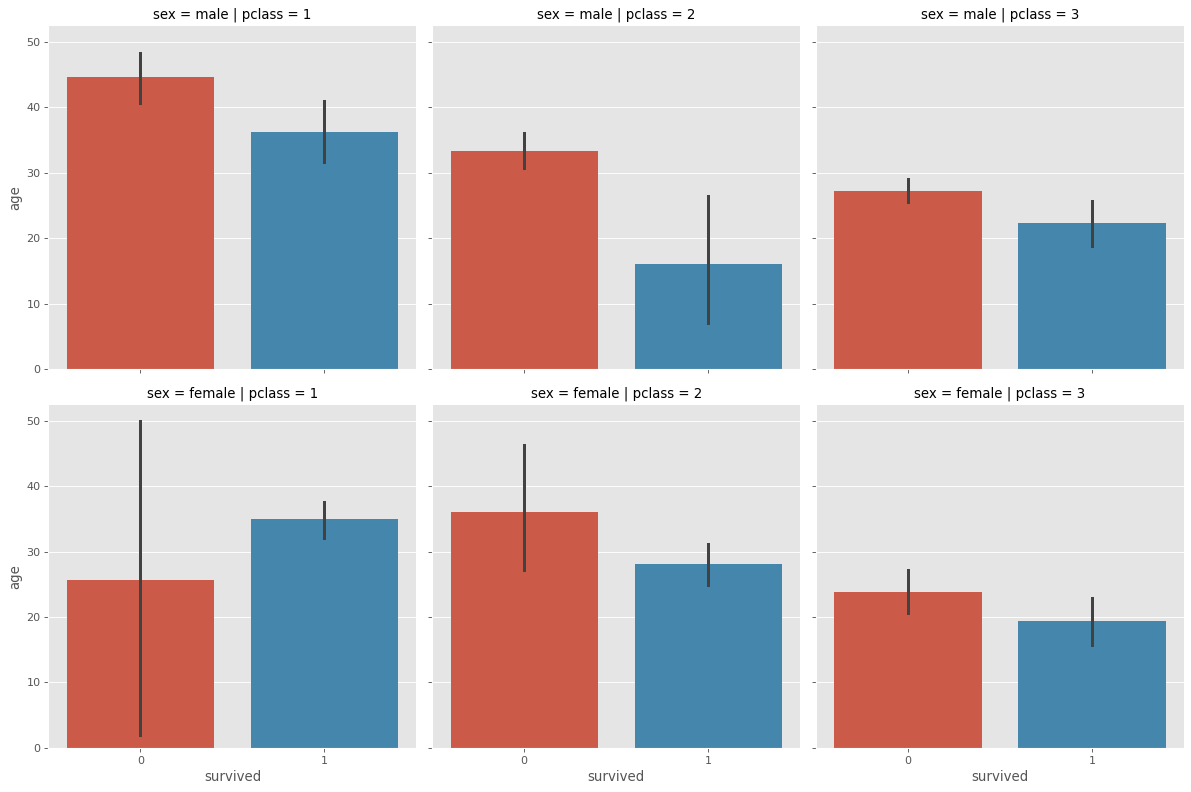

In [175]:
sns.catplot(
    x='survived',
    y = 'age', 
    data = titanic,
    kind = 'bar',
    row = 'sex',
    col = 'pclass'
)

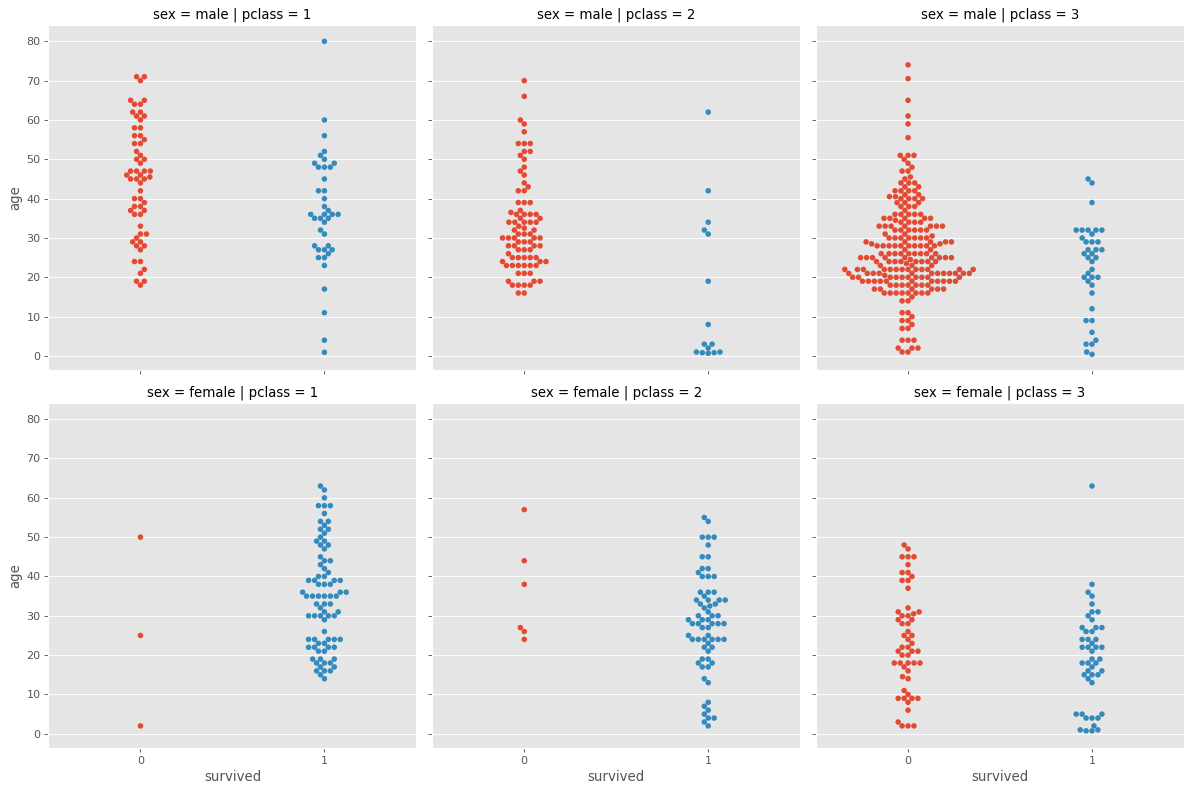

In [176]:
sns.catplot(
    x='survived',
    y = 'age', 
    data = titanic,
    kind = 'swarm',
    row = 'sex',
    col = 'pclass'
)

FARE ANALYSIS

Text(0.5, 1.0, 'Fare Distribution')

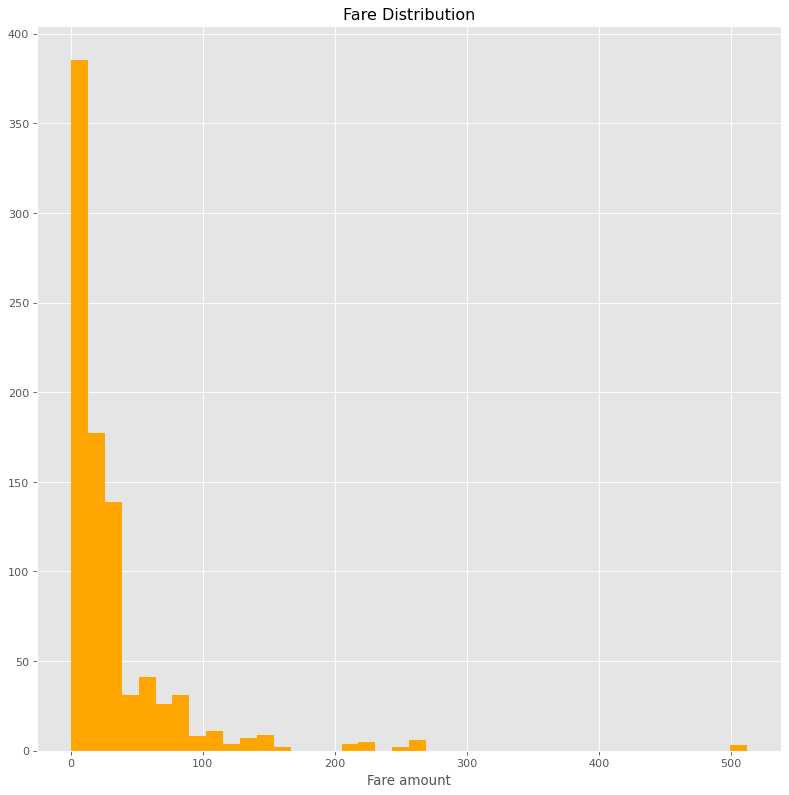

In [184]:
titanic.fare.hist(bins = 40, color = 'orange', figsize=(12,12))\

plt.xlabel('Fare amount')

plt.title('Fare Distribution')
                                                       

<AxesSubplot:xlabel='fare', ylabel='Density'>

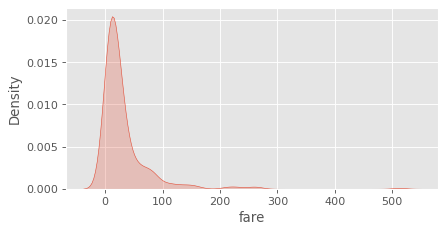

In [186]:
sns.kdeplot(
    x = 'fare',
    data = titanic,
    shade = True

)


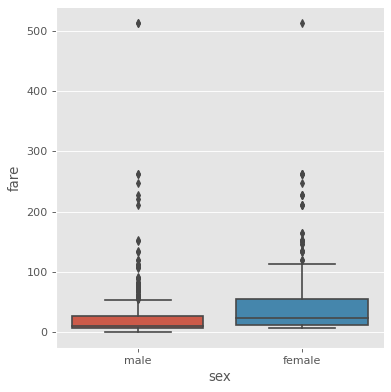

In [187]:
sns.catplot(
    x= 'sex', 
    y = 'fare',
    data = titanic,
    kind = 'box'
           )

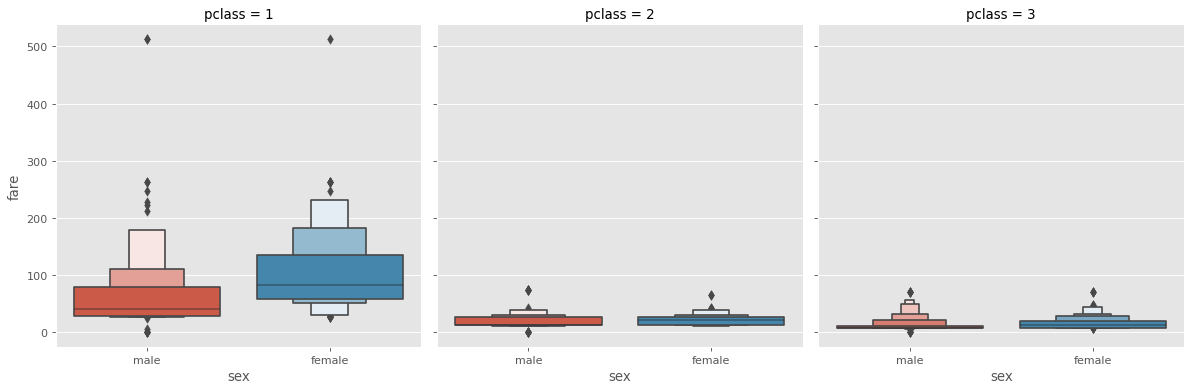

In [191]:
sns.catplot(
    x= 'sex', 
    y = 'fare',
    data = titanic,
    kind = 'boxen',
    col = 'pclass'
           )

C:\Users\97798\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\97798\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 49.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\97798\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\97798\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\97798\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.6% of the points

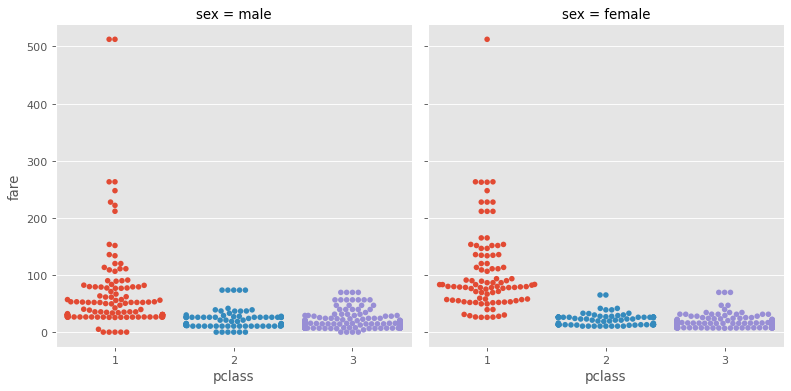

In [194]:
sns.catplot(
    x= 'pclass', 
    y = 'fare',
    data = titanic,
    kind = 'swarm',
    
    col = 'sex'
           )


C:\Users\97798\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\97798\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\97798\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\97798\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


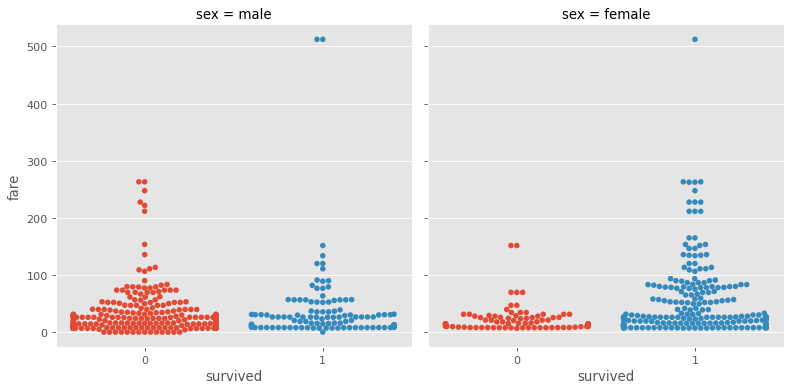

In [196]:
sns.catplot(
    x= 'survived', 
    y = 'fare',
    data = titanic,
    kind = 'swarm',
    
    col = 'sex'
           )


C:\Users\97798\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 32.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\97798\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\97798\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\97798\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


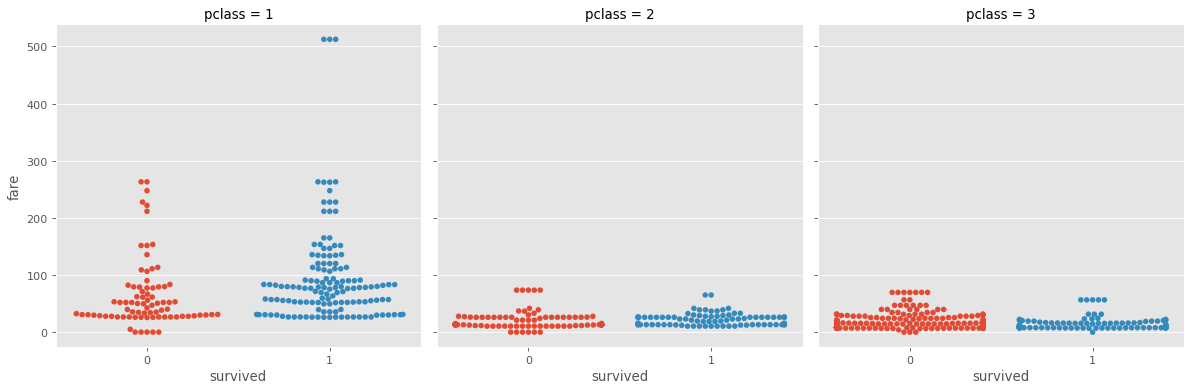

In [197]:
sns.catplot(
    x= 'survived', 
    y = 'fare',
    data = titanic,
    kind = 'swarm',
    
    col = 'pclass'
           )


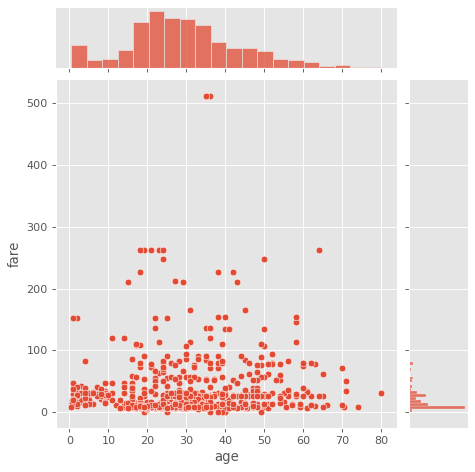

In [198]:
sns.jointplot(
    x= 'age',
    y = 'fare',
    data = titanic
)

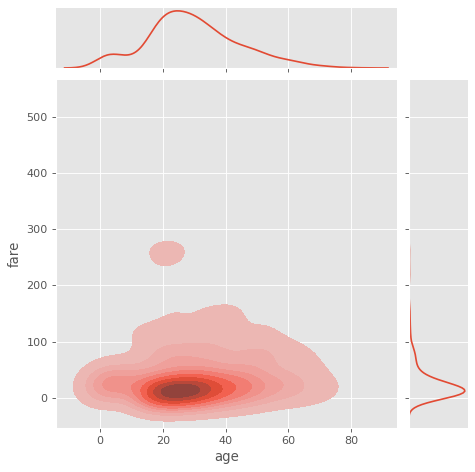

In [200]:
sns.jointplot(
    x= 'age',
    y = 'fare',
    data = titanic,
    kind='kde',
    shade = True
)

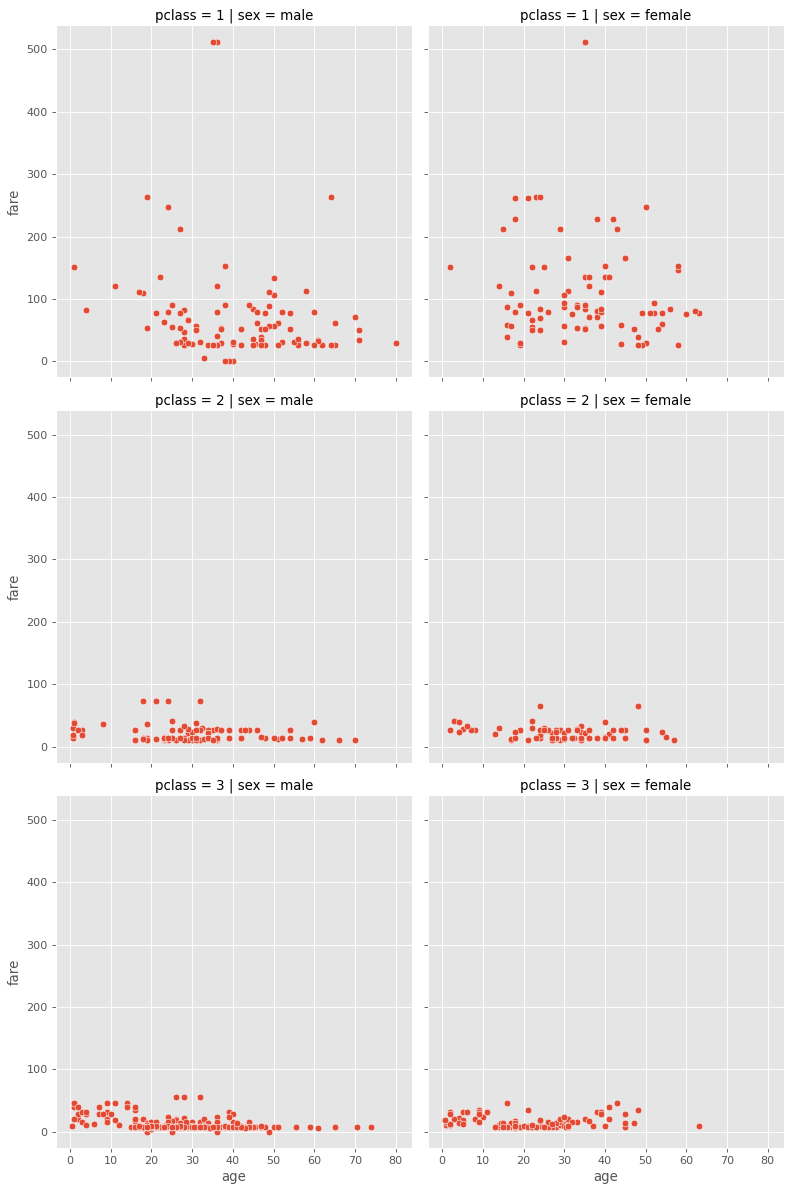

In [203]:
sns.relplot(
    x='age',
    y = 'fare',
    data = titanic,
    col = 'sex',
    row = 'pclass'
)

Sibsp Analysis

In [205]:
titanic.sibsp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

<AxesSubplot:xlabel='sibsp', ylabel='count'>

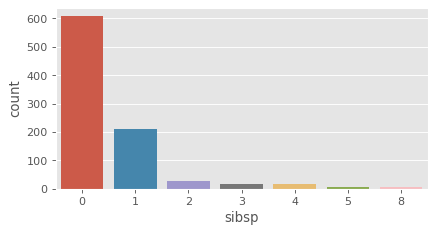

In [206]:
sns.countplot(
    x= 'sibsp',
    data = titanic
)

<AxesSubplot:xlabel='sibsp', ylabel='count'>

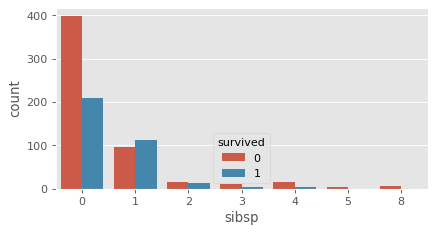

In [207]:
sns.countplot(
    x= 'sibsp',
    data = titanic,
    hue = 'survived'
)

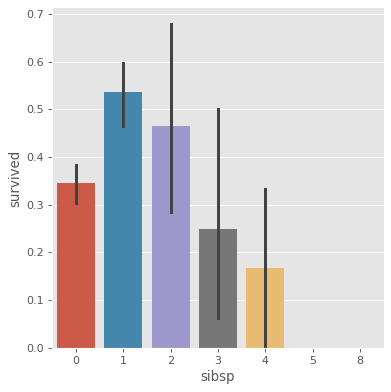

In [210]:
sns.catplot(
    x= 'sibsp',
    y= 'survived',
    kind= 'bar',
    data = titanic

)

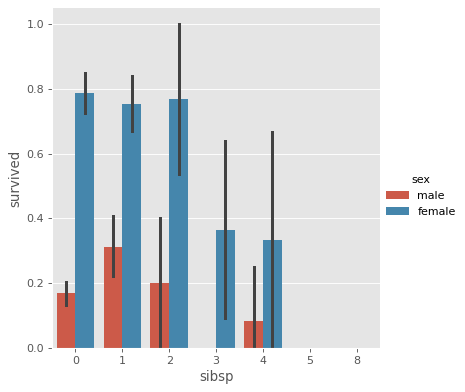

In [211]:
sns.catplot(
    x= 'sibsp',
    y= 'survived',
    kind= 'bar',
    data = titanic,
    hue = 'sex'

)

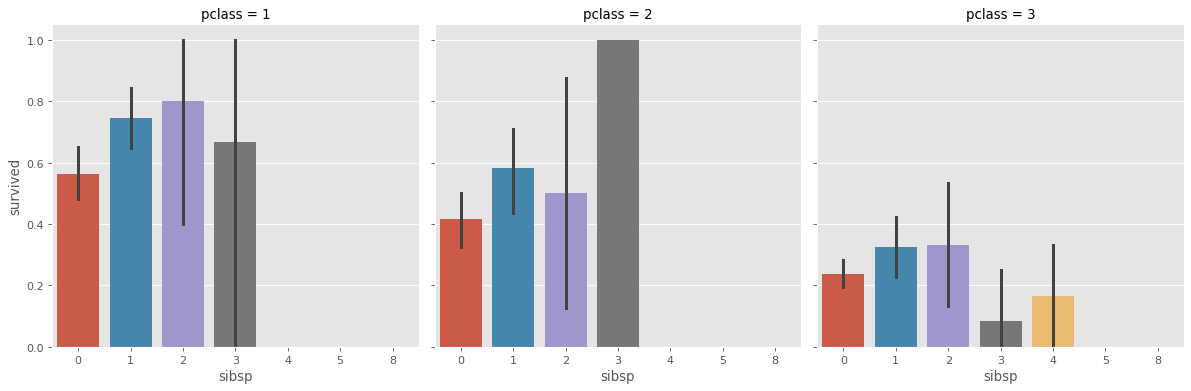

In [213]:
sns.catplot(
    x= 'sibsp',
    y= 'survived',
    kind= 'bar',
    data = titanic,
    col = 'pclass'

)

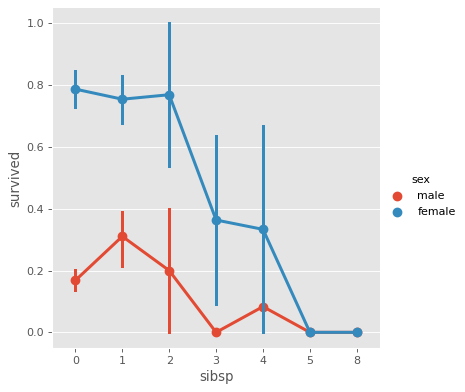

In [217]:
sns.catplot(
    x= 'sibsp',
    y= 'survived',
    kind= 'point',
    data = titanic,
    hue = 'sex'
    

)

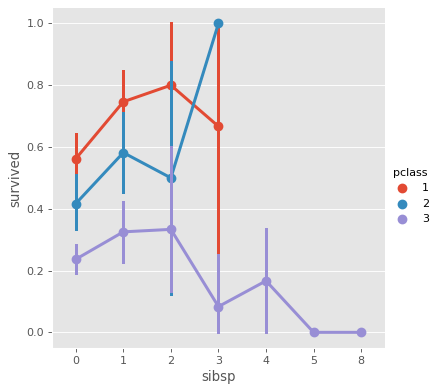

In [218]:
sns.catplot(
    x= 'sibsp',
    y= 'survived',
    kind= 'point',
    data = titanic,
    hue = 'pclass'
    

)

C:\Users\97798\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\97798\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\97798\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\97798\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\97798\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.1% of the points 

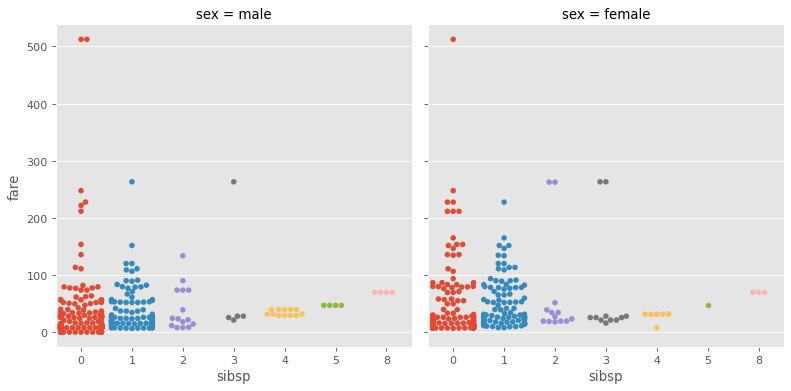

In [220]:
sns.catplot(
    x= 'sibsp',
    y= 'fare',
    kind= 'swarm',
    data = titanic,
    col = 'sex'
    

)

C:\Users\97798\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\97798\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\97798\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\97798\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\97798\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.6% of the points

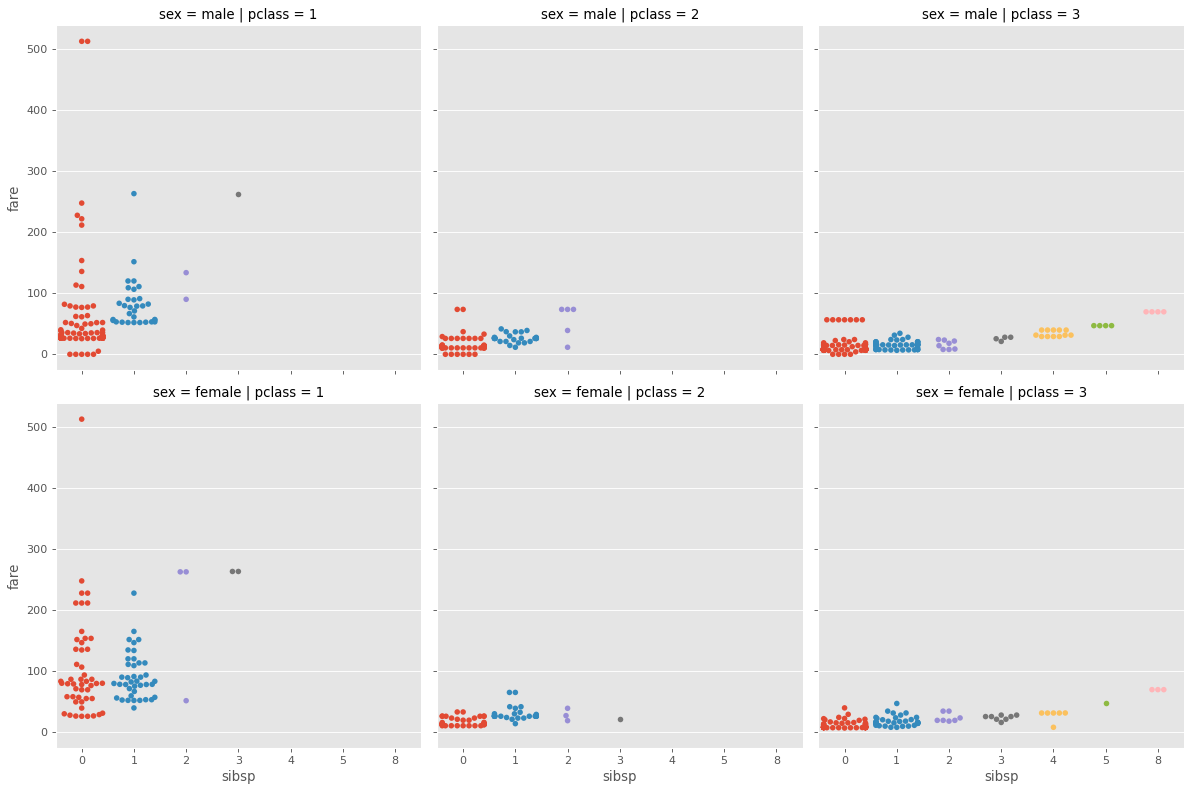

In [222]:
sns.catplot(
    x= 'sibsp',
    y= 'fare',
    kind= 'swarm',
    data = titanic,
    col = 'pclass',
    row = 'sex'
    

)

Parch

In [224]:
titanic.parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

<AxesSubplot:xlabel='parch', ylabel='count'>

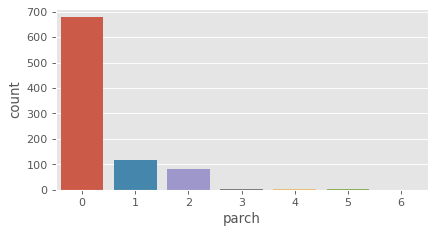

In [225]:
sns.countplot(
    x= 'parch',
    data = titanic
)

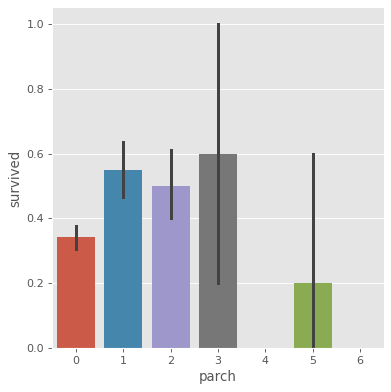

In [230]:
sns.catplot(
    x= 'parch',
    y = 'survived',
    data = titanic,
   
    kind='bar'
)

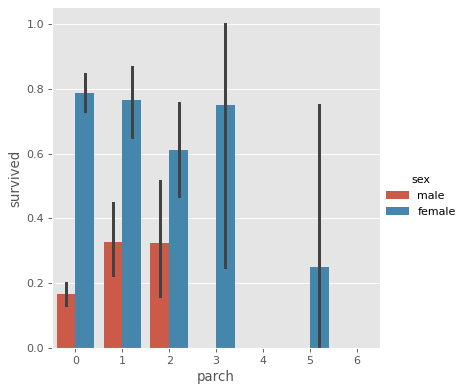

In [232]:
sns.catplot(
    x= 'parch',
    y = 'survived',
    data = titanic,
    hue = 'sex',
    kind='bar'
)

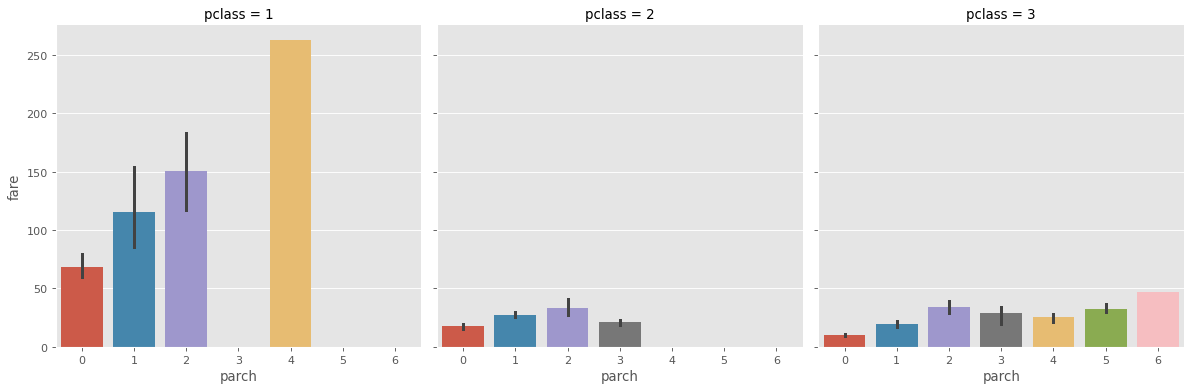

In [237]:
sns.catplot(
    x= 'parch',
    y = 'fare',
    data = titanic,
    col = 'pclass',
    kind='bar',
    
)

Embarked

In [239]:
titanic.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

<AxesSubplot:xlabel='embarked', ylabel='count'>

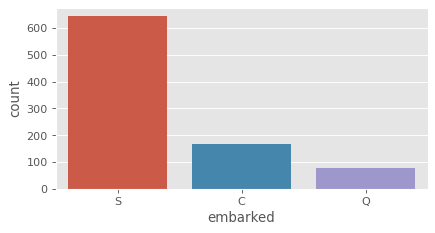

In [240]:
sns.countplot(
    x = 'embarked',
    data = titanic
)

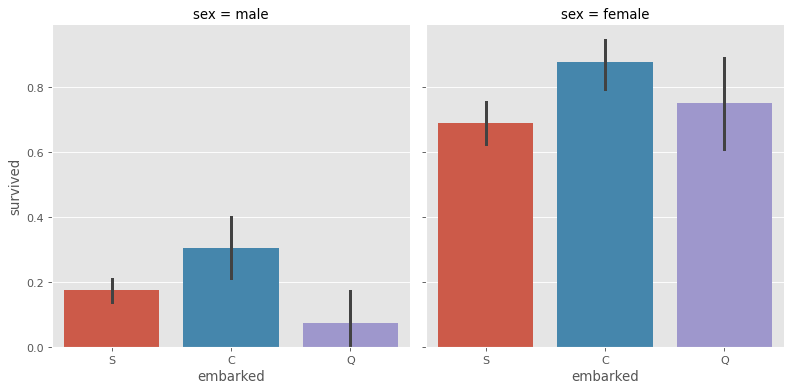

In [244]:
sns.catplot(
    x = 'embarked',
    y = 'survived',
    data = titanic,
    kind = 'bar', col = 'sex'
)

Who

In [247]:
titanic.who.value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

<AxesSubplot:xlabel='who', ylabel='count'>

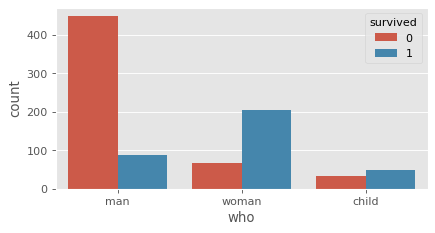

In [249]:
sns.countplot(
    x = 'who',
    data = titanic,
    hue = 'survived'
)

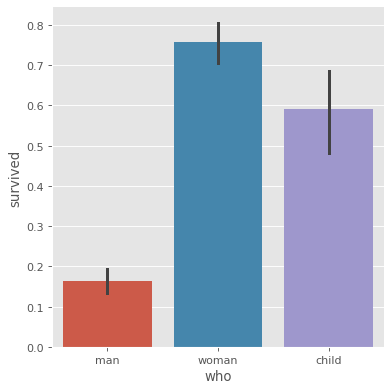

In [254]:
sns.catplot(
    x = 'who',
    y = 'survived',
    data = titanic,
    kind = 'bar'
)

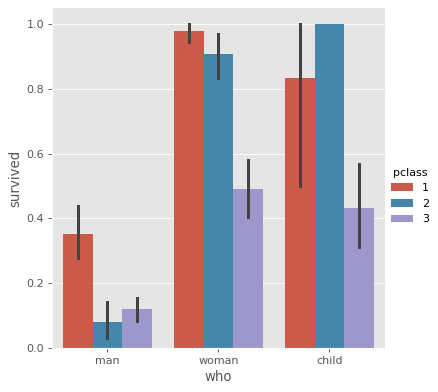

In [255]:
sns.catplot(
    x = 'who',
    y = 'survived',
    data = titanic,
    kind = 'bar',
    hue = 'pclass'
)

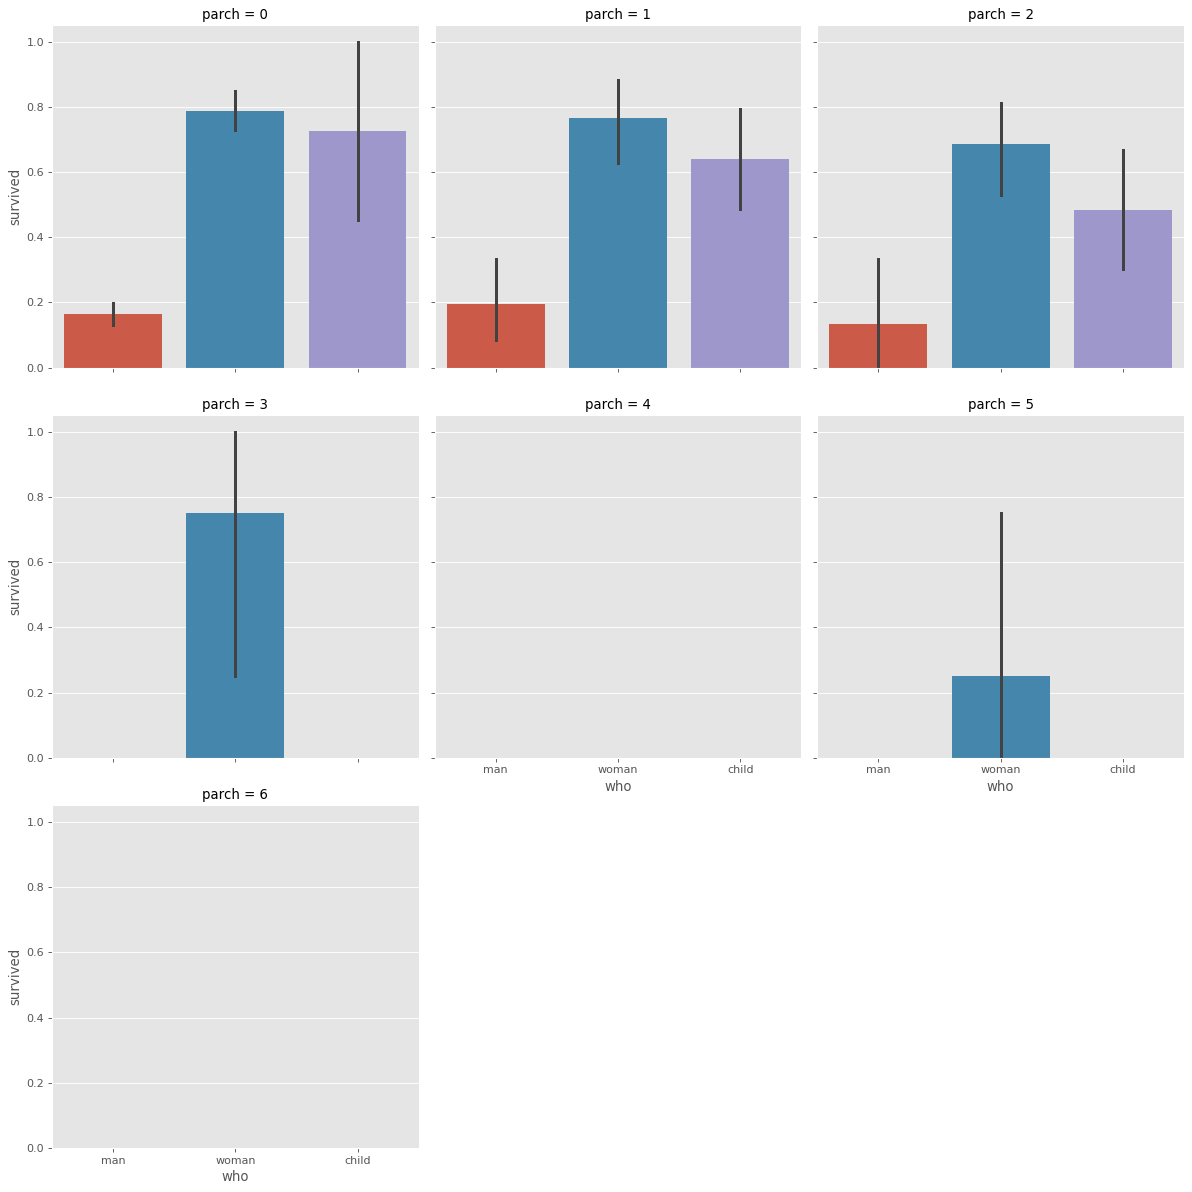

In [257]:
sns.catplot(
    x = 'who',
    y = 'survived',
    data = titanic,
    kind = 'bar',
    col = 'parch',
    col_wrap=3
)